<a href="https://colab.research.google.com/github/susan2807/Proyecto-desempleo-en-Colombia/blob/main/PROYECTO_DATAXPERIENCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introducción**📄


El objetivo de este proyecto es analizar el mercado laboral en Colombia, buscando entender las principales características de la población ocupada y desempleada.


**Pregunta principal:** ¿Cómo se distribuye la tasa de desempleo por departamento en Colombia y qué patrones clave se pueden identificar?

**Preguntas de apoyo:** ¿Existen departamentos con tasas de desempleo atípicamente altas? ¿Cómo se comparan la población ocupada, desempleada e inactiva en las diferentes regiones?

## **Búsqueda y obtención de los datos 🔍**

La fuente de los datos para este proyecto es pública, proveniente de la Gran Encuesta Integrada de Hogares (GEIH) del DANE para el año 2024. Estos datos nos permiten analizar la tasa de desempleo y la composición de la fuerza laboral a nivel regional en Colombia.

DANE (Departamento Administrativo Nacional de Estadística). Se utilizaron dos archivos

*"No ocupados.CSV" y "Fuerza de trabajo.CSV".*

El conjunto de datos contiene información detallada por departamento, con variables clave como la población estimada y el estado laboral de los ciudadanos. Estos datos son ideales para responder las preguntas planteadas, ya que permiten calcular la tasa de desempleo y analizarla a nivel regional.

# **Primer acercamiento a los datos 🧠**

Antes de la limpieza, se realizó una inspección inicial de los datos para entender su estructura, dimensiones y tipos de variables. Esto se logra con comandos como

*df.head() y df.info(). *

In [ ]:
# ======================
# 1. Importar librerías
# ======================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Configuración de estilo de las gráficas
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# ======================
# 2. Cargar y Limpiar los Datos (Módulo 1)
# ======================
# Asume que los archivos "No ocupados.CSV" y "Fuerza de trabajo.CSV"
# ya están subidos a tu entorno de Google Colab.

# Cargar los datasets
df_no = pd.read_csv("No ocupados.CSV", sep=";", encoding="latin1", on_bad_lines='skip')
df_fz = pd.read_csv("Fuerza de trabajo.CSV", sep=";", encoding="latin1", on_bad_lines='skip')

# **Limpieza y preparación de los datos 🧹**

En esta fase, se llevó a cabo el procesamiento de los datos para asegurar su calidad y consistencia. Se realizaron los siguientes pasos:

Se detectaron y manejaron los datos faltantes en la columna del código de departamento (DPTO).

Se unieron los dos archivos para crear un único **DataFrame.**

Se convirtieron los tipos de variables, asegurando que la columna DPTO fuera un string de **dos dígitos** para una correcta identificación.

In [ ]:
# Etiquetar los datos con una columna de estado laboral
df_no['Estado_Laboral'] = 'No Ocupado'
df_fz['Estado_Laboral'] = 'Ocupado'

# Concatenar los dos DataFrames en uno solo
df_unificado = pd.concat([df_fz, df_no], ignore_index=True)

# Limpiar y convertir la columna DPTO a tipo de dato numérico.
df_unificado['DPTO'] = pd.to_numeric(df_unificado['DPTO'], errors='coerce')

# Eliminar las filas donde el valor del departamento (DPTO) es nulo
df_unificado.dropna(subset=['DPTO'], inplace=True)

# Convertir la columna DPTO a un tipo de dato entero y luego a string
df_unificado['DPTO'] = df_unificado['DPTO'].astype(int).astype(str).str.zfill(2)

print("✅ Datos cargados y preparados exitosamente para el análisis regional.")

✅ Datos cargados y preparados exitosamente para el análisis regional.


## **Análisis exploratorio y estadístico (EDA) 📊**

En esta sección, se realizó el análisis principal para responder las preguntas del proyecto. Se calcularon las estadísticas descriptivas para entender la distribución del desempleo y se utilizaron visualizaciones para identificar patrones clave.


**Estadísticas Descriptivas:** Se obtuvieron medidas como la media, la mediana, la desviación estándar y los cuartiles de la tasa de desempleo por departamento.


**Visualizaciones:** Se crearon gráficos de barras, boxplots e histogramas para explorar la distribución de las tasas de desempleo y la composición de la población.


📊 Resumen de las 10 mayores tasas de desempleo por departamento:
     Nombre_Departamento  Tasa_Desempleo
DPTO                                    
27                 CHOCÓ       39.213834
19                 CAUCA       36.030482
52                NARIÑO       10.777559
20                 CESAR        9.250303
23               CÓRDOBA        8.345623
17                CALDAS        7.798860
08             ATLÁNTICO        7.623670
47             MAGDALENA        7.606821
13               BOLÍVAR        7.562816
41                 HUILA        7.411083


/tmp/ipython-input-843608011.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_analisis_final['Nombre_Departamento'], y=df_analisis_final['Tasa_Desempleo'], palette='viridis')


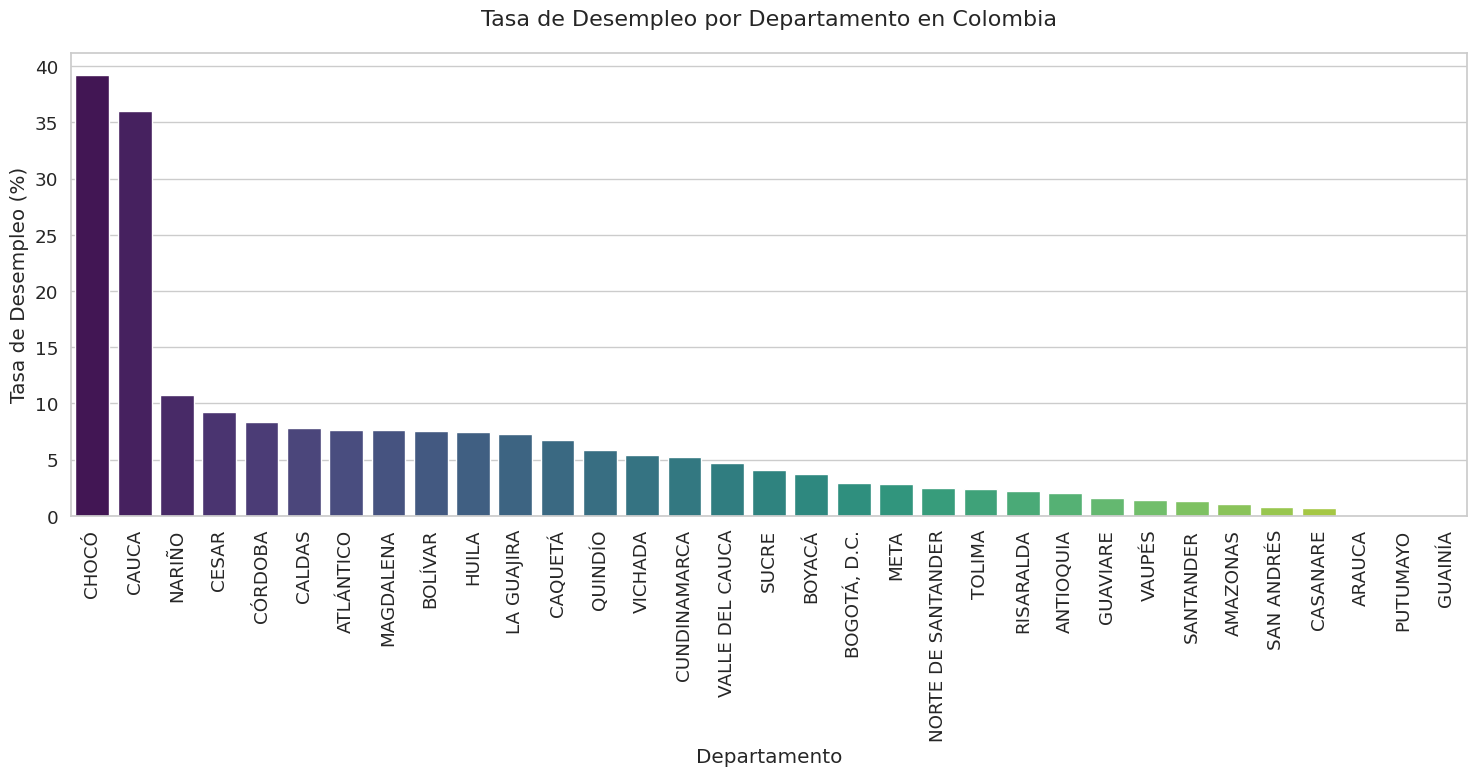


✅ Generando gráfico de barras para comparar los tres grupos de población: Ocupada, Desempleada e Inactiva.


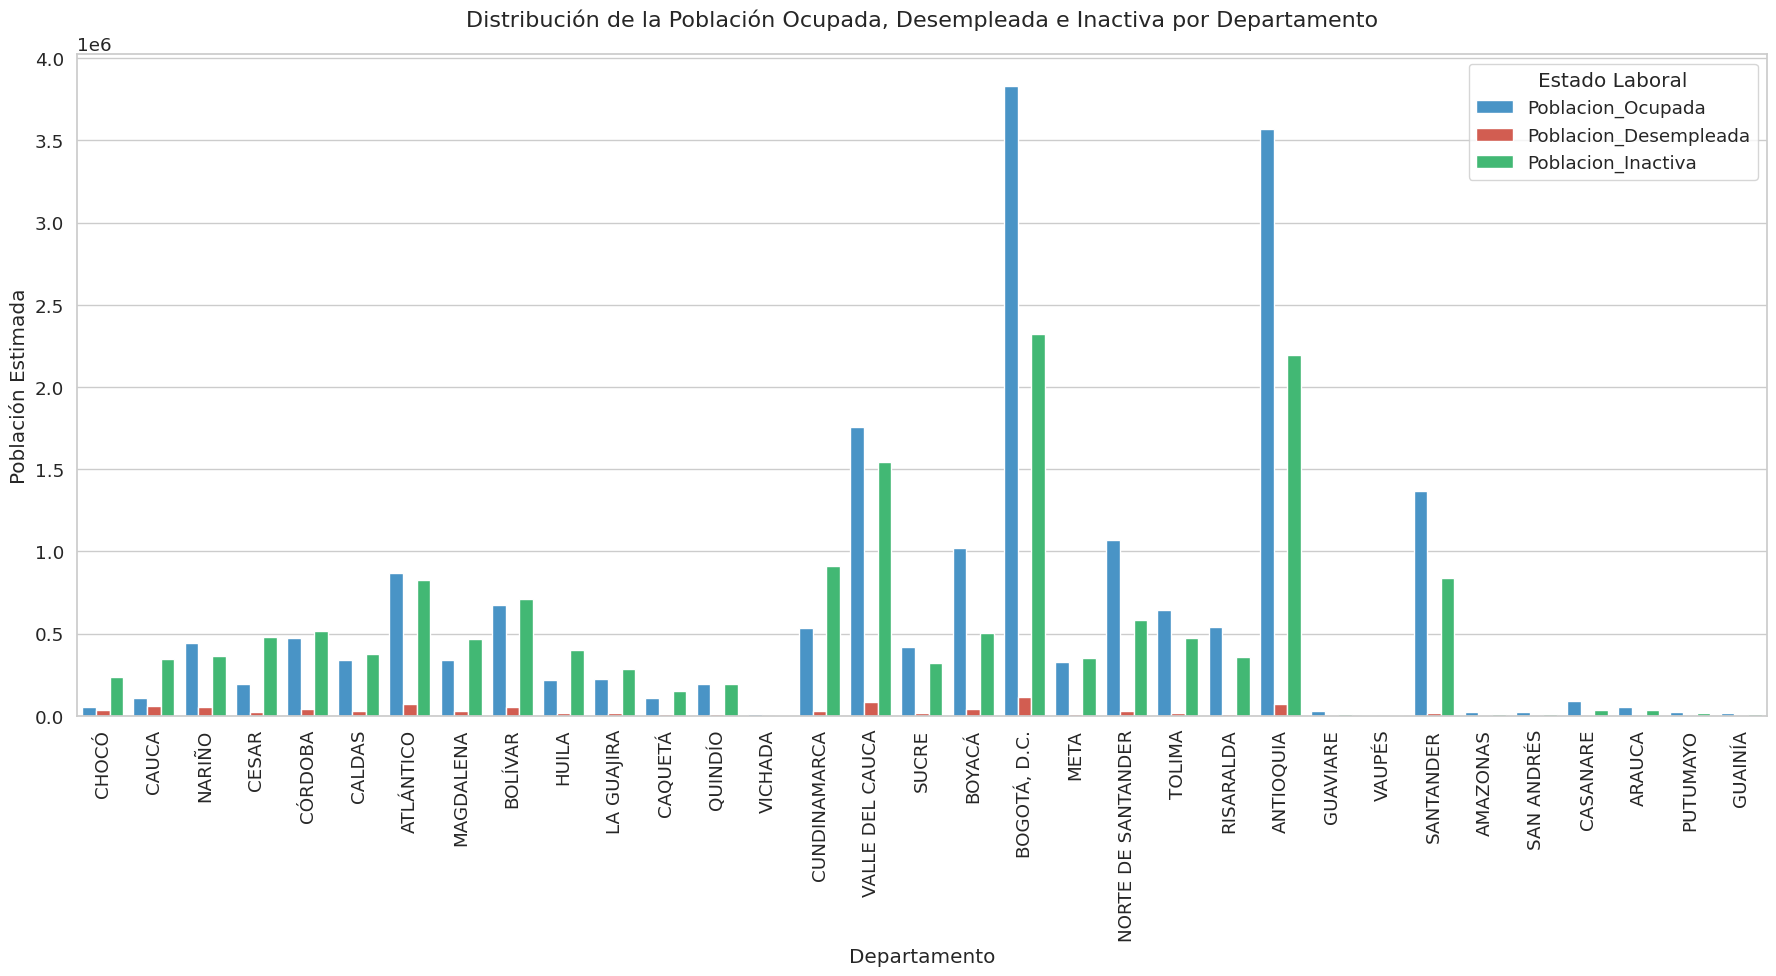


📊 Estadísticas descriptivas de la tasa de Desempleo por departamento:
count    33.000000
mean      6.241345
std       8.652441
min       0.000000
25%       1.584185
50%       4.030689
75%       7.562816
max      39.213834
Name: Tasa_Desempleo, dtype: float64


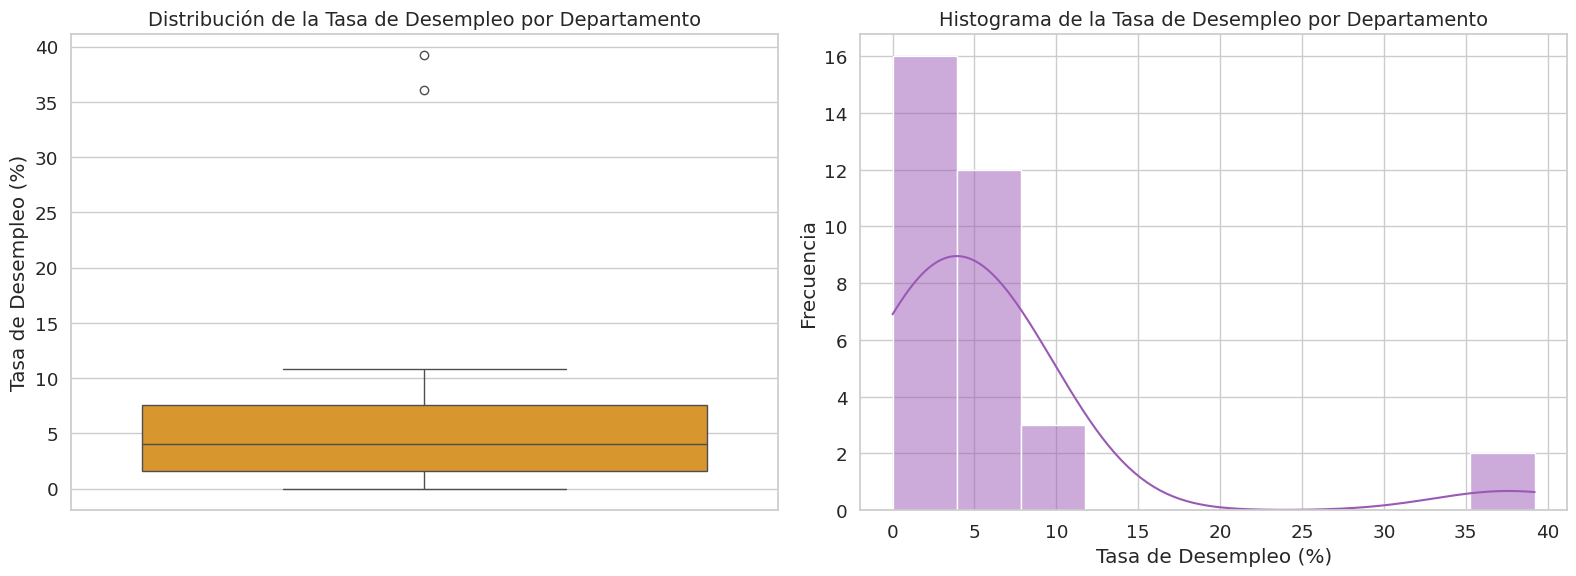

In [ ]:
# ======================================================
# 3. Análisis Detallado (Módulo 2 y 3)
# ======================================================

# Calcular la Población Ocupada (PO), Desempleada (PD) e Inactiva (PI)
poblacion_ocupada_dpto = df_unificado[df_unificado['Estado_Laboral'] == 'Ocupado'].groupby('DPTO')['FEX_C18'].sum()
poblacion_desempleada_dpto = df_unificado[df_unificado['P744'] == 1].groupby('DPTO')['FEX_C18'].sum()
poblacion_inactiva_dpto = df_unificado[(df_unificado['Estado_Laboral'] == 'No Ocupado') & (df_unificado['P744'] != 1)].groupby('DPTO')['FEX_C18'].sum()

# Crear un DataFrame para el análisis final con los tres grupos
df_analisis_final = pd.DataFrame({
    'Poblacion_Ocupada': poblacion_ocupada_dpto,
    'Poblacion_Desempleada': poblacion_desempleada_dpto,
    'Poblacion_Inactiva': poblacion_inactiva_dpto
}).fillna(0)

# Calcular las tasas oficiales
df_analisis_final['Poblacion_Total'] = df_analisis_final['Poblacion_Ocupada'] + df_analisis_final['Poblacion_Desempleada'] + df_analisis_final['Poblacion_Inactiva']
df_analisis_final['Fuerza_de_Trabajo'] = df_analisis_final['Poblacion_Ocupada'] + df_analisis_final['Poblacion_Desempleada']
df_analisis_final['Tasa_Desempleo'] = (df_analisis_final['Poblacion_Desempleada'] / df_analisis_final['Fuerza_de_Trabajo']) * 100

# Añadir la columna de nombres de departamentos
nombres_departamentos = {
    '05': 'ANTIOQUIA', '08': 'ATLÁNTICO', '11': 'BOGOTÁ, D.C.', '13': 'BOLÍVAR',
    '15': 'BOYACÁ', '17': 'CALDAS', '18': 'CAQUETÁ', '19': 'CAUCA',
    '20': 'CESAR', '23': 'CÓRDOBA', '25': 'CUNDINAMARCA', '27': 'CHOCÓ',
    '41': 'HUILA', '44': 'LA GUAJIRA', '47': 'MAGDALENA', '50': 'META',
    '52': 'NARIÑO', '54': 'NORTE DE SANTANDER', '63': 'QUINDÍO', '66': 'RISARALDA',
    '68': 'SANTANDER', '70': 'SUCRE', '73': 'TOLIMA', '76': 'VALLE DEL CAUCA',
    '81': 'ARAUCA', '85': 'CASANARE', '86': 'PUTUMAYO', '88': 'SAN ANDRÉS',
    '91': 'AMAZONAS', '94': 'GUAINÍA', '95': 'GUAVIARE', '97': 'VAUPÉS',
    '99': 'VICHADA'
}
df_analisis_final['Nombre_Departamento'] = df_analisis_final.index.map(nombres_departamentos)

# Ordenar los datos por la tasa de desempleo de forma descendente
df_analisis_final = df_analisis_final.sort_values(by='Tasa_Desempleo', ascending=False)

print("\n📊 Resumen de las 10 mayores tasas de desempleo por departamento:")
print(df_analisis_final[['Nombre_Departamento', 'Tasa_Desempleo']].head(10))

# ======================================================
# 4. Gráficos de Visualización (Módulo 2 y 3)
# ======================================================

# --- Gráfico de Barras de la Tasa de Desempleo ---
plt.figure(figsize=(15, 8))
sns.barplot(x=df_analisis_final['Nombre_Departamento'], y=df_analisis_final['Tasa_Desempleo'], palette='viridis')
plt.title('Tasa de Desempleo por Departamento en Colombia', fontsize=16, pad=20)
plt.ylabel('Tasa de Desempleo (%)')
plt.xlabel('Departamento')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# --- Gráfico de Barras Agrupadas para los Tres Grupos ---
print("\n✅ Gráfico de barras para comparar los tres grupos de población: Ocupada, Desempleada e Inactiva.")
df_comparacion = df_analisis_final[['Poblacion_Ocupada', 'Poblacion_Desempleada', 'Poblacion_Inactiva', 'Nombre_Departamento']].reset_index(drop=True)
df_comparacion_melted = df_comparacion.melt(id_vars='Nombre_Departamento', var_name='Estado_Laboral', value_name='Poblacion_Estimada')

plt.figure(figsize=(18, 10))
sns.barplot(
    x="Nombre_Departamento",
    y="Poblacion_Estimada",
    hue="Estado_Laboral",
    data=df_comparacion_melted,
    palette={"Poblacion_Ocupada": "#3498DB", "Poblacion_Desempleada": "#E74C3C", "Poblacion_Inactiva": "#2ECC71"}
)
plt.title('Distribución de la Población Ocupada, Desempleada e Inactiva por Departamento', fontsize=16, pad=20)
plt.xlabel('Departamento')
plt.ylabel('Población Estimada')
plt.xticks(rotation=90)
plt.legend(title='Estado Laboral')
plt.tight_layout()
plt.show()

# --- Estadísticas y Gráficos de Distribución ---
print("\n📊 Estadísticas descriptivas de la tasa de Desempleo por departamento:")
print(df_analisis_final["Tasa_Desempleo"].describe())

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(y=df_analisis_final["Tasa_Desempleo"], ax=axes[0], color="#F39C12")
axes[0].set_title("Distribución de la Tasa de Desempleo por Departamento", fontsize=14)
axes[0].set_ylabel("Tasa de Desempleo (%)")

sns.histplot(df_analisis_final["Tasa_Desempleo"], kde=True, bins=10, ax=axes[1], color="#9B59B6")
axes[1].set_title("Histograma de la Tasa de Desempleo por Departamento", fontsize=14)
axes[1].set_xlabel("Tasa de Desempleo (%)")
axes[1].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()


## **Conclusiones y Recomendaciones📈**

Este análisis exploratorio nos permitió responder a la pregunta principal: *la tasa de desempleo en Colombia muestra una distribución asimétrica. Aunque la mayoría de los departamentos tienen una tasa baja, existen casos atípicos que enfrentan desafíos significativos, lo cual se evidencia en los gráficos.*

**Hallazgo clave:** El departamento con la tasa de desempleo más alta es un caso atípico que necesita atención focalizada, ya que eleva significativamente el promedio nacional.

**Aplicacion Profesional**:Este análisis tiene una aplicación profesional muy concreta. Una entidad como el Departamento Nacional de Planeación (DNP) podría utilizar estos hallazgos para diseñar políticas de empleo específicas para los departamentos que más lo necesitan. En lugar de una solución general, podrían crear programas de capacitación o inversión adaptados a cada región

## **Anexos 📎**
**Fuentes:** Documentación del DANE sobre las encuestas y los códigos de los departamentos.

https://microdatos.dane.gov.co/index.php/catalog/819/data-dictionary/F65?file_name=Fuerza%20de%20trabajo

https://microdatos.dane.gov.co/index.php/catalog/819/data-dictionary/F66?file_name=No%20ocupados


**Normalización/Estandarización de datos:** Este es un paso que se realiza en un proyecto de machine learning. Si el objetivo fuera construir un modelo predictivo, este paso sería crucial para que las variables numéricas estén en la misma escala y el modelo funcione de manera óptima.

**Modelado de datos (conceptual):** Aunque no se construyó un modelo en el código, se propone la Regresión Logística como un modelo adecuado para predecir la probabilidad de desempleo de una persona. Se evaluaría usando métricas como la Precisión y la Matriz de Confusión.

**Resultados y discusión:** Los resultados son los gráficos generados por el código, y la discusión es la narrativa que acompaña a esos gráficos, explicando lo que significan en el contexto del problema.